## Target calculation ##


### Tiff's notes ###

 - could leave padding (-> target size) more flexible - but given that x2 always seems to work best this probably isn't necessary



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import theano

%matplotlib inline

In [22]:
def quick_plot(target):
    N = target.shape[0]
    plot_args = {'extent': [0, N, 0, N],
                 'interpolation': 'None',
                 'origin': 'lower'}
    fig, ax = plt.subplots(ncols=1, figsize=(5,5))
    ax.imshow(target, **plot_args)

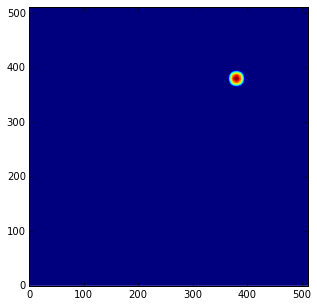

In [25]:
def make_power2(n, r0, d, A=1.0):
    """
    Create n x n target: 
    2nd order power law centred on r0=(x0,y0) with diameter d and amplitude A
    """
    x = np.array(range(n))*1.
    X, Y = np.meshgrid(x, x)
    
    delta_r2 = np.power(X - r0[0], 2) + np.power(Y - r0[1], 2)
    z = A - 4*A/d**2 * delta_r2
    z[delta_r2 > d**2/4] = 0
    
    return z

t = make_power2(512,(380,380),32)
quick_plot(t)
np.savetxt('targets/example_power2.dat', t)

In [15]:
r[r>20] = 0
r

array([[ 16.,   9.,   4.,   1.,   0.,   1.,   4.,   9.,  16.,   0.],
       [ 17.,  10.,   5.,   2.,   1.,   2.,   5.,  10.,  17.,   0.],
       [ 20.,  13.,   8.,   5.,   4.,   5.,   8.,  13.,  20.,   0.],
       [  0.,  18.,  13.,  10.,   9.,  10.,  13.,  18.,   0.,   0.],
       [  0.,   0.,  20.,  17.,  16.,  17.,  20.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])